In [32]:
#import các thư viện
import pandas as pd
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

In [29]:
#import data VCB
df_VCB = pd.read_csv('VCB Historical Data.csv',index_col='Date')
df_VCB = df_VCB.reset_index(drop=True)

In [30]:
df_VCB

,Price,Open,High,Low,Vol.,Change %
0,41161,41391,41698,41084,1380000,0.19%
1,41161,41468,41545,40470,1370000,0.00%
2,41775,40931,41775,40393,1670000,1.49%
3,41929,42466,42620,41852,1500000,0.37%
4,42236,42236,42390,41852,1680000,0.73%
...,...,...,...,...,...,...
1068,88200,88300,88500,87800,491000,-0.11%
1069,88400,88300,89100,88200,414800,0.23%
1070,88400,88400,88500,87800,488900,0.00%
1071,88000,88300,88600,87500,695100,-0.45%


In [4]:
df_VCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1073 non-null   int64 
 1   Open      1073 non-null   int64 
 2   High      1073 non-null   int64 
 3   Low       1073 non-null   int64 
 4   Vol.      1073 non-null   int64 
 5   Change %  1073 non-null   object
dtypes: int64(5), object(1)
memory usage: 50.4+ KB


In [6]:
df_VCB.describe()

,Price,Open,High,Low,Vol.
count,1073.000000,1073.000000,1073.000000,1073.000000,1.073000e+03
mean,70558.582479,70506.337372,71359.189189,69666.874185,1.354767e+06
std,12022.403359,12056.976302,12211.310008,11820.344358,7.850407e+05
min,41161.000000,40931.000000,41545.000000,40393.000000,1.804900e+05
25%,63354.000000,63354.000000,63815.000000,62817.000000,8.411100e+05
50%,73238.000000,73500.000000,74167.000000,72387.000000,1.170000e+06
75%,78600.000000,78500.000000,79742.000000,77419.000000,1.670000e+06
max,96000.000000,95800.000000,96300.000000,94000.000000,8.010000e+06


<function matplotlib.pyplot.show(close=None, block=None)>

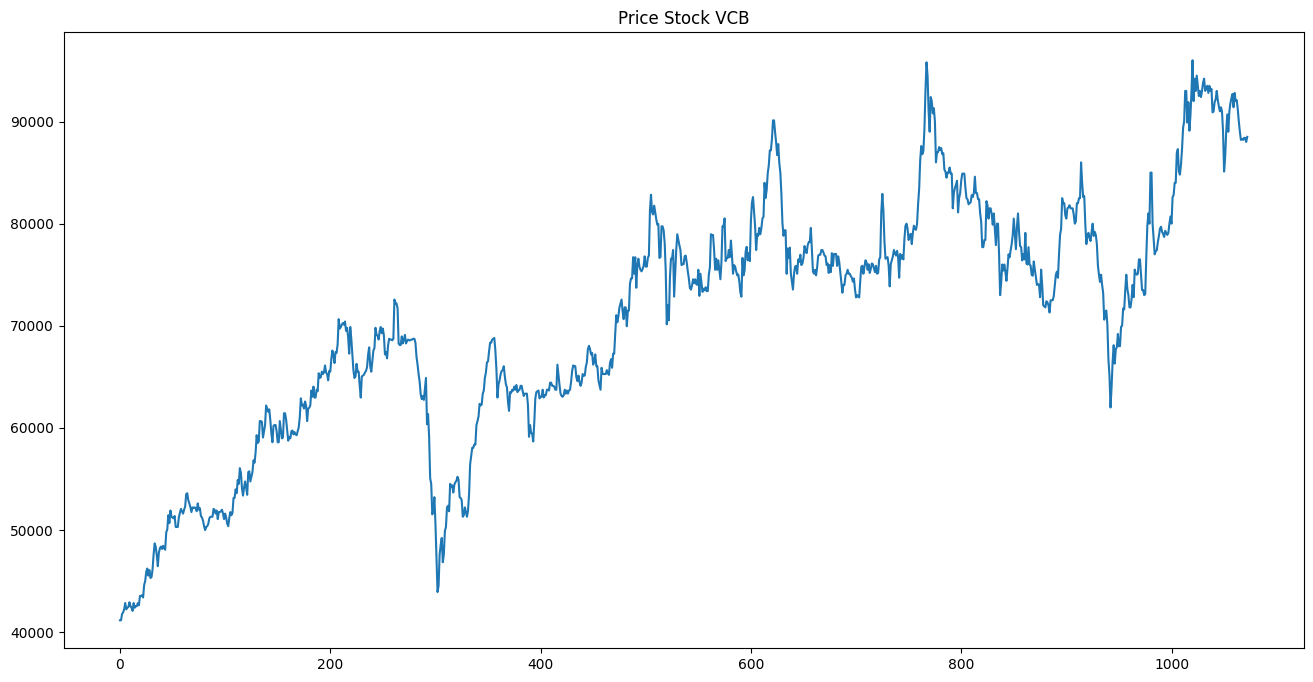

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df_VCB['Price'].index,df_VCB['Price'],label='Price')
plt.title('Price Stock VCB')
plt.show

In [31]:
# Chia tập dữ liệu thành train, validation và test
train_ratio = 0.7  # Tỷ lệ dữ liệu huấn luyện
valid_ratio = 0.15  # Tỷ lệ dữ liệu validation
test_ratio = 0.15  # Tỷ lệ dữ liệu kiểm tra

In [ ]:
# Chia tập train và tập còn lại
X_train, X_remain, y_train, y_remain = train_test_split(df_VCB['Price'], df_VNI['Price'], test_size=1 - train_ratio, random_state=0)

# Chia tập validation và tập test
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=test_ratio/(test_ratio + valid_ratio), random_state=0)

In [5]:
# Split the data into training, testing, and validation sets
train_size_VCB = int(0.7 * len(df_VCB))
test_size_VCB = int(0.2 * len(df_VCB))
val_size_VCB = len(df_VCB) - train_size_VCB - test_size_VCB

train_data_VCB = df_VCB[:train_size_VCB]
test_data_VCB = df_VCB[train_size_VCB:train_size_VCB+test_size_VCB]
val_data_VCB = df_VCB[train_size_VCB+test_size_VCB:]

In [6]:
df_VNI = pd.read_csv('VN Index Historical Data.csv',index_col='Date')
df_VNI = df_VNI.reset_index(drop=True)

In [7]:
df_VNI

,Price,Open,High,Low,Vol.,Change %
0,"1,048.98","1,055.02","1,058.14","1,047.47",569.68K,-0.57%
1,"1,055.02","1,053.81","1,057.15","1,050.89",539.76K,0.11%
2,"1,053.81","1,052.89","1,054.72","1,049.11",453.79K,0.09%
3,"1,052.89","1,064.30","1,068.79","1,052.89",786.53K,-1.07%
4,"1,064.30","1,069.45","1,070.96","1,062.26",673.04K,-0.48%
...,...,...,...,...,...,...
1068,887.44,891.37,891.87,883.67,112.83K,-0.25%
1069,889.64,890.47,896.63,885.30,127.55K,0.99%
1070,880.90,872.69,881.48,861.85,136.57K,0.31%
1071,878.22,889.78,892.21,872.12,156.58K,-1.52%


In [8]:
def convert_value(value):
    if isinstance(value, str):
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
        else:
            return float(value)
    else:
        return value

In [9]:
df_VNI['Price']=df_VNI['Price'].replace(',','',regex=True).astype(float)

df_VNI['Vol.'] = df_VNI['Vol.'].apply(convert_value)

# Thay thế giá trị NaN bằng 0
df_VNI['Vol.'] = df_VNI['Vol.'].fillna(0)
df_VNI['Vol.']=df_VNI['Vol.'].astype(int)

In [10]:
#Chuyển dữ liệu lần cuối, % thay đổi về dạng int
df_VNI['Price']=df_VNI['Price'].replace(',','',regex=True).astype(float)
df_VNI['Open']=df_VNI['Open'].astype(str).str.replace(',','').astype(float)
df_VNI['High']=df_VNI['High'].astype(str).str.replace(',','').astype(float)
df_VNI['Low']=df_VNI['Low'].astype(str).str.replace(',','').astype(float)
df_VNI['Change %']=df_VNI['Change %'].astype(str).str.replace('%','').astype(float)

In [14]:
df_VNI

,Price,Open,High,Low,Vol.,Change %
0,1048.98,1055.02,1058.14,1047.47,569680,-0.57
1,1055.02,1053.81,1057.15,1050.89,539760,0.11
2,1053.81,1052.89,1054.72,1049.11,453790,0.09
3,1052.89,1064.30,1068.79,1052.89,786530,-1.07
4,1064.30,1069.45,1070.96,1062.26,673040,-0.48
...,...,...,...,...,...,...
1068,887.44,891.37,891.87,883.67,112830,-0.25
1069,889.64,890.47,896.63,885.30,127550,0.99
1070,880.90,872.69,881.48,861.85,136570,0.31
1071,878.22,889.78,892.21,872.12,156580,-1.52


In [15]:
df_VNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1073 non-null   float64
 1   Open      1073 non-null   float64
 2   High      1073 non-null   float64
 3   Low       1073 non-null   float64
 4   Vol.      1073 non-null   int32  
 5   Change %  1073 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 46.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

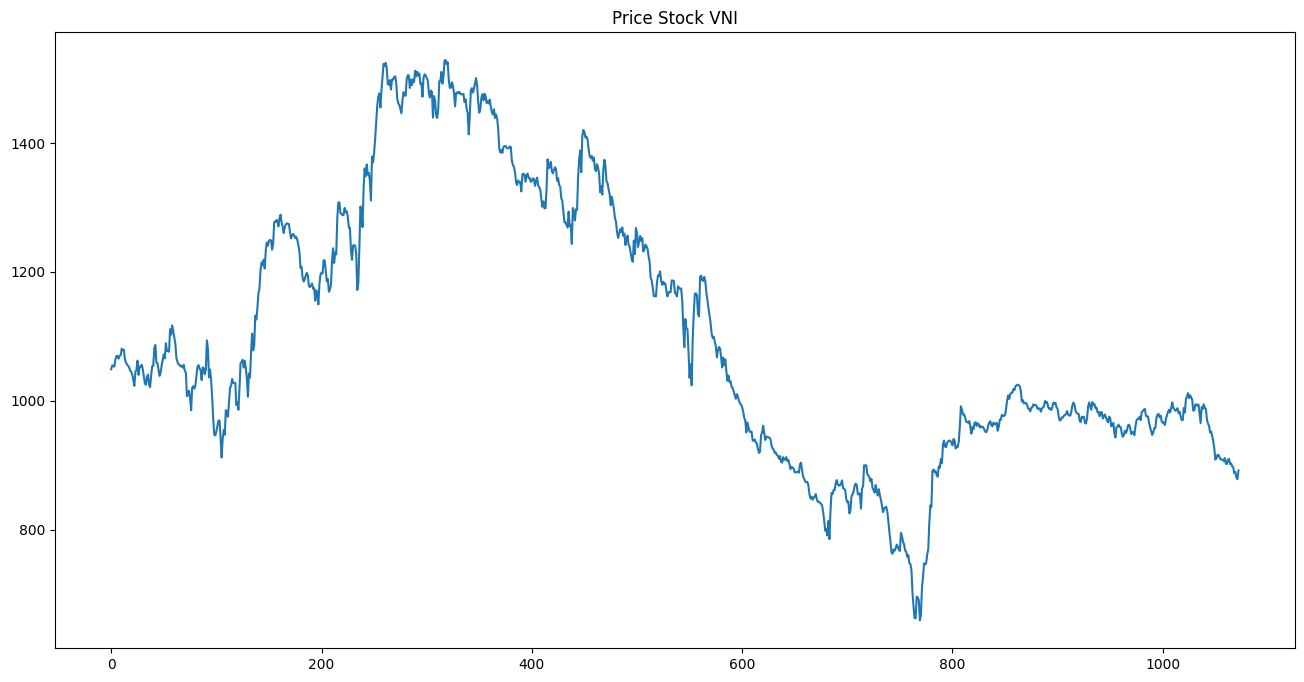

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df_VNI['Price'].index,df_VNI['Price'],label='Price')
plt.title('Price Stock VNI')
plt.show

In [11]:
# Split the data into training, testing, and validation sets
train_size_VNI = int(0.7 * len(df_VNI))
test_size_VNI = int(0.2 * len(df_VNI))
val_size_VNI = len(df_VNI) - train_size_VNI - test_size_VNI

train_data_VNI = df_VNI[:train_size_VNI]
test_data_VNI = df_VNI[train_size_VNI:train_size_VNI+test_size_VNI]
val_data_VNI = df_VNI[train_size_VNI+test_size_VNI:]

In [12]:
# Quá trình Training VCB
x_train_VCB = np.array(train_data_VCB.index).reshape(-1, 1)
y_train_VCB = np.array(train_data_VCB['Price'])
# Quá trình Training VNI
x_train_VNI = np.array(train_data_VNI.index).reshape(-1, 1)
y_train_VNI = np.array(train_data_VNI['Price'])

In [14]:
# Xác định các giá trị đề xuất ban đầu cho p và q
lag_acf = acf(y_train_VCB, nlags=20)
lag_pacf = pacf(y_train_VCB, nlags=20, method='ols')

In [15]:
# Xác định giá trị đề xuất cho p từ đồ thị PACF
q = np.argmax(lag_pacf > 0.2)

In [16]:
# Xác định giá trị đề xuất cho q từ đồ thị ACF
p = np.argmax(lag_acf > 0.2)

In [17]:
# Xác định giá trị đề xuất cho d (order of differencing)
d = 1 

In [18]:
# Hiển thị giá trị đề xuất
print("Đề xuất giá trị p, d, q:", p, d, q)

Đề xuất giá trị p, d, q: 0 1 0


In [19]:
model = sm.tsa.ARIMA(endog=y_train_VCB, exog=y_train_VNI, order=(0, 1, 0))

In [21]:
# Phù hợp mô hình với dữ liệu
model_fit = model.fit()

In [22]:
# Xem tóm tắt của mô hình
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  751
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6349.817
Date:                Wed, 24 May 2023   AIC                          12703.633
Time:                        14:33:11   BIC                          12712.873
Sample:                             0   HQIC                         12707.194
                                - 751                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0851      3.012     -0.028      0.977      -5.988       5.818
sigma2      1.326e+06   4.44e+04     29.875      0.000    1.24e+06    1.41e+06
Ljung-Box (L1) (Q):                   0.17   Jarque-

In [48]:
#Tìm tham số cho mô hình ARIMAX
model  = auto_arima(y_train_VCB,  
                    exog= y_train_VNI,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)   


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12700.721, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12702.232, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12704.143, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12704.156, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12701.632, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12706.757, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12706.900, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12701.455, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12701.478, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12706.150, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12705.374, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12705.519, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12703.415, Time=0.82 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=12699.725, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0

In [27]:
# Quá trình test_VCB
x_test_VCB = np.array(test_data_VCB.index).reshape(-1, 1)
y_test_VCB = np.array(test_data_VCB['Price'])
y_pred_VCB = model.predict(n_periods=len(y_test_VCB),exog=y_train_VNI,typ='levels')


TypeError: Model.predict() missing 1 required positional argument: 'params'

In [50]:
df_VCB = df_VCB.reset_index(drop=True)

In [51]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df_VCB.index[-1]


In [52]:
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days),exog=y_train_VNI)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[78136.31187659 78316.58028913 78613.00639319 78531.24747255
 78232.84308457 78222.69204437 78496.45476289 78584.72828138
 78356.31813586 78208.67225646 78377.92747935 78563.58424979
 78460.12830418 78258.18145134 78295.93432226 78494.05897606
 78516.12634899 78338.77779428 78267.2286758  78411.05926814
 78518.8335819  78416.51673899 78287.11228481 78344.70582902
 78481.28302306 78467.22407901 78336.53693165 78311.9263841
 78426.01285637 78481.69651434]


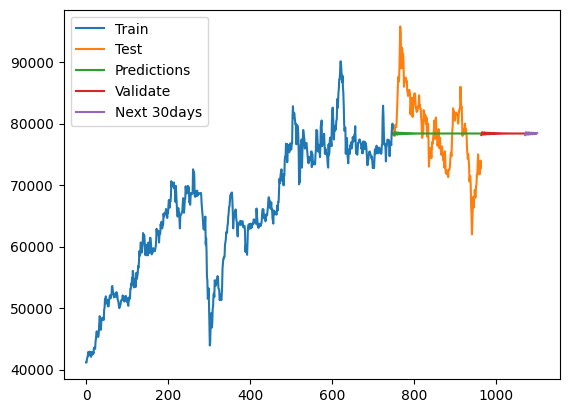

<Figure size 5000x480 with 0 Axes>

In [53]:
plt.plot(train_data_VCB.index, train_data_VCB['Price'])
plt.plot(test_data_VCB.index, test_data_VCB['Price'])
plt.plot(test_data_VCB.index, y_pred_VCB)
plt.plot(val_data_VCB.index, y_pred_val_VCB)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next 30days'])
plt.figure().set_figwidth(50)
plt.show()

In [54]:
mae= mean_absolute_error(test_data_VCB['Price'], y_pred_VCB)
mape = mean_absolute_percentage_error(test_data_VCB['Price'], y_pred_VCB)
mse = mean_squared_error(test_data_VCB['Price'], y_pred_VCB)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4755.93
MAPE: 6.06%
MSE: 35531719.70
RMSE: 5960.85


In [55]:
mae= mean_absolute_error(val_data_VCB['Price'], y_pred_val_VCB)
mape = mean_absolute_percentage_error(val_data_VCB['Price'], y_pred_val_VCB)
mse = mean_squared_error(val_data_VCB['Price'], y_pred_val_VCB)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 8790.77
MAPE: 9.79%
MSE: 106013615.18
RMSE: 10296.29
